<p style="text-align: center">    
    
# <p style="text-align: center"> STATISTIQUES et APPRENTISSAGE - CentraleSupélec </p>

## <p style="text-align: center"> Projet - 24 Mai 2021 - étude du rendement d'un champs de maïs  </p>

## Contexte

L'objectif est de cette étude est d'estimer le rendement d'un champ de mais à partir de données climatiques.


On utilisera les données issues du "the National Agricultural Statistics Service of the United States Department of Agriculture" (https://www.nass.usda.gov/Statistics_by_Subject/)



In [3]:
# Imports des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
np.random.seed(1)


## Données

On va d'abord charger et visualiser notre dataset.

In [4]:
df = pd.read_csv('meteo.csv', index_col=0) # chargement du dataset
df.head() # Les 5 premières lignes de notre dataset

,year,ID,y,TMIN97,TMIN98,TMIN99,TMIN100,TMIN101,TMIN102,TMIN103,...,ET292,ET293,ET294,ET295,ET296,ET297,ET298,ET299,ET300,ET301
0,2001,4003,1107,2.2,4.1,4.8,4.1,0.2,2.2,2.2,...,4.63,3.99,4.36,4.26,3.89,4.50,3.67,4.67,4.68,4.57
1,2002,4003,995,6.6,8.7,11.6,11.9,14.0,14.1,14.8,...,3.76,4.15,3.68,2.58,2.25,2.51,3.18,3.05,2.04,2.71
2,2003,4003,1020,3.8,6.6,8.2,8.9,9.4,9.8,11.7,...,5.00,4.90,4.90,5.08,4.86,3.92,4.20,4.32,3.73,3.73
3,2004,4003,935,6.8,9.0,8.3,8.8,9.4,6.6,4.9,...,3.77,3.65,4.21,3.36,3.32,3.33,3.11,0.70,1.80,2.22
4,2005,4003,1046,10.4,11.7,7.0,4.8,6.2,6.7,10.3,...,3.32,3.63,4.34,4.40,3.52,3.92,4.34,3.71,3.32,4.14


Chaque ligne correspond à une année et a un ID de localisation (représentant un site particulier de champs de maïs, il y en a 103). (Correspondant à un comté américain) On trouve aussi le rendement du champs de mais et les données climatiques pour une saison de culture. 

Regardons les valeurs un peu plus en détail

In [5]:
df.describe() # obtenir la moyenne de chaque variable, l'écart-type, les quantiles..

,year,ID,y,TMIN97,TMIN98,TMIN99,TMIN100,TMIN101,TMIN102,TMIN103,...,ET292,ET293,ET294,ET295,ET296,ET297,ET298,ET299,ET300,ET301
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,2005.393056,28511.247222,979.306944,3.472500,1.442222,3.322917,6.420694,6.409167,3.984028,6.476389,...,2.949653,3.290625,2.378444,2.104736,2.548861,2.558111,2.619653,2.365611,2.664806,2.677694
std,2.849924,7282.933939,80.542279,6.652078,5.784514,4.922729,4.528817,4.900021,4.747661,5.922217,...,1.078230,1.387687,1.163954,1.226486,1.445047,1.294758,1.307471,1.192556,1.193431,1.142630
min,2001.000000,4003.000000,748.000000,-12.400000,-13.000000,-11.400000,-2.500000,-2.500000,-4.600000,-4.500000,...,0.800000,0.780000,0.200000,0.130000,0.120000,0.170000,0.790000,0.260000,0.190000,0.540000
25%,2003.000000,20198.000000,922.500000,-2.525000,-2.325000,0.700000,2.600000,2.500000,0.100000,0.900000,...,2.140000,2.220000,1.590000,1.150000,1.530000,1.585000,1.610000,1.720000,1.947500,1.970000
50%,2005.000000,31067.000000,981.000000,6.100000,0.300000,3.700000,5.600000,5.000000,4.300000,5.250000,...,2.540000,3.120000,2.160000,1.890000,2.620000,2.560000,2.435000,2.110000,2.460000,2.770000
75%,2008.000000,31137.000000,1034.000000,8.500000,6.500000,6.200000,10.700000,10.525000,7.400000,12.725000,...,3.762500,4.272500,3.090000,2.922500,3.440000,3.442500,3.330000,2.820000,3.440000,3.440000
max,2010.000000,48421.000000,1214.000000,13.900000,14.000000,14.400000,15.500000,18.400000,14.100000,16.600000,...,8.420000,8.690000,6.580000,7.000000,7.510000,6.030000,8.400000,6.070000,6.180000,7.000000


In [6]:
print(df.columns[3:])
# On extrait les labels sans les nombres correspondant au jour de l'année des noms des données climatiques
list_variables = np.unique([''.join([l for l in s if not l.isdigit()]) for s in list(df.columns[3:])])

print(list_variables)
print('Les différentes variables environnementales sont  : ' + ', '.join(list_variables))                       

Index(['TMIN97', 'TMIN98', 'TMIN99', 'TMIN100', 'TMIN101', 'TMIN102',
       'TMIN103', 'TMIN104', 'TMIN105', 'TMIN106',
       ...
       'ET292', 'ET293', 'ET294', 'ET295', 'ET296', 'ET297', 'ET298', 'ET299',
       'ET300', 'ET301'],
      dtype='object', length=1025)
['ET' 'P' 'RG' 'TMAX' 'TMIN']
Les différentes variables environnementales sont  : ET, P, RG, TMAX, TMIN


- ET est l'evapo-transpiration https://fr.wikipedia.org/wiki/%C3%89vapotranspiration
- P est la précipitation
- RG le rayonnement
- TMAX (resp. TMIN) est la température maximimale enregistrée (resp. min) 

Les variables sont enregistrées lors des jours 97, 100, ..., 301 de l'année, qui correspondent à la période entre l'ensemencement et la récolte.

On peut afficher les graphiques de l'évolution des différentes variables pour l'année 2002 pour voir leurs tendances : 

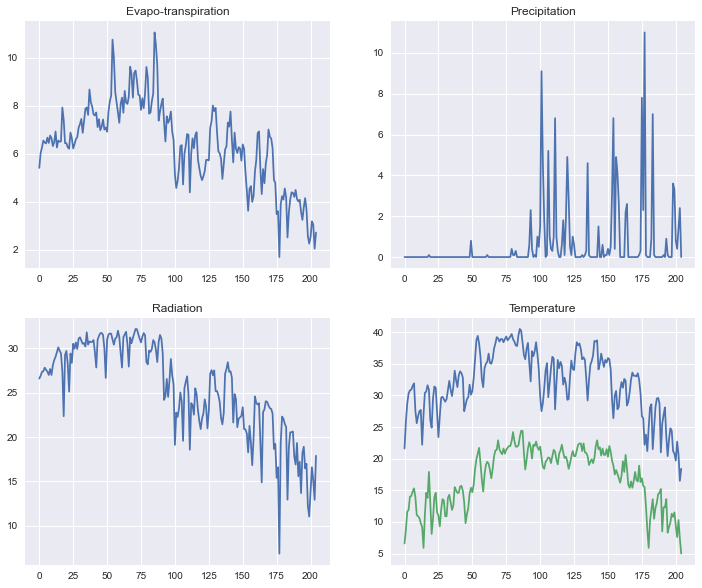

In [7]:
ID = 4003
year = 2002

dic_variable = {'ET': 'Evapo-transpiration', 'P': 'Precipitation', 'RG': 'Radiation', 'TMAX': 'Temperature'}

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs = axs.ravel()
for i in range(4): 
    axs[i].plot([df.loc[(df['year'] == year) & (df['ID'] == ID), key].values[0] 
                 for key in df.keys() if list_variables[i] in key])
    axs[i].set_title(dic_variable[list_variables[i]])
axs[3].plot([df.loc[(df['year'] == year) & (df['ID'] == ID), key].values[0] 
             for key in df.keys() if list_variables[4] in key])

L'objectif est de prédire le rendement d'une culture en fonction de l'enregistrement de ces variables météorologiques. 
Nous allons aborder deux problèmes différents : 
- Peut-on prédire le rendement d'un site non visité ? 
- Peut-on déduire la zone géographique des sites à partir des enregistrements météorologiques ? 

Commençons par le premier problème : 

In [8]:
print('Il y a {} differents sites'.format(df['ID'].nunique()))

Il y a 103 differents sites


On sélectionne 10 sites aléatoires pour notre ensemble de test. On constuit enseuite notre ensemble de test et d'entrainement.
On utilise des dataframes intermédiaires `df_train` et `df_test`.


In [10]:
list_sites = df.ID.unique()
n_sites=len(list_sites)
sites_test = list_sites[np.random.randint(0, len(list_sites), 10)]
sites_train = [s for s in list_sites if s not in sites_test]
df_train = df.set_index('ID').loc[sites_train].reset_index()
df_test = df.set_index('ID').loc[sites_test].reset_index()

In [11]:
df_train.head()

,ID,year,y,TMIN97,TMIN98,TMIN99,TMIN100,TMIN101,TMIN102,TMIN103,...,ET292,ET293,ET294,ET295,ET296,ET297,ET298,ET299,ET300,ET301
0,4003,2001,1107,2.2,4.1,4.8,4.1,0.2,2.2,2.2,...,4.63,3.99,4.36,4.26,3.89,4.50,3.67,4.67,4.68,4.57
1,4003,2002,995,6.6,8.7,11.6,11.9,14.0,14.1,14.8,...,3.76,4.15,3.68,2.58,2.25,2.51,3.18,3.05,2.04,2.71
2,4003,2003,1020,3.8,6.6,8.2,8.9,9.4,9.8,11.7,...,5.00,4.90,4.90,5.08,4.86,3.92,4.20,4.32,3.73,3.73
3,4003,2004,935,6.8,9.0,8.3,8.8,9.4,6.6,4.9,...,3.77,3.65,4.21,3.36,3.32,3.33,3.11,0.70,1.80,2.22
4,4003,2005,1046,10.4,11.7,7.0,4.8,6.2,6.7,10.3,...,3.32,3.63,4.34,4.40,3.52,3.92,4.34,3.71,3.32,4.14


In [12]:
X_train = df_train[df_train.keys()[3:]].values
y_train = df_train['y'].values

X_test = df_test[df_test.keys()[3:]].values
y_test = df_test['y'].values

Regardons la forme de nos données : 

In [14]:
print('X_train shape : {}'.format(X_train.shape))
print('y_train shape : {}'.format(y_train.shape))
print('X_test shape : {}'.format(X_test.shape))
print('y_test shape : {}'.format(y_test.shape))
n_train = X_train.shape[0]
n_test = X_test.shape[0]

X_train shape : (664, 1025)
y_train shape : (664,)
X_test shape : (56, 1025)
y_test shape : (56,)


## Normalisation de nos données

Commençons donc par normaliser les données afin d'obtenir `X_train_n` et `X_test_n`. On utilisera pour ce faire 'Standard Scaler' de Scikit learn.


In [15]:
from sklearn.preprocessing import StandardScaler

## standardization des donnéesn 
Scaler = StandardScaler()

X_train_n = Scaler.fit_transform(X_train)
X_test_n = Scaler.fit_transform(X_test)


## Une méthode de base de la prédiction

  
Comme référence pour la prédiction du rendement des cultures pour une année spécifique et un nouveau site de l'ensemble de test nous allons calculer le rendement moyen pour cette année spécifique dans notre ensemble d'entrainement et nous l'utiliserons pour approximer le rendement du cas de test. Nous allons aussi calculer l'erreur quadratique moyenne de notre ensemble de test.


In [27]:
from sklearn.metrics import mean_squared_error  

year_date=df_train.year.unique() # toute les années étudiées dans notre cas
print(year_date)

# Calcul du rendement moyen
rendement_moy=[]
for k in year_date :
    toto=df_train['year']==k
    index=[]
    for i in range(len(toto)) :
        if toto[i] == True :
            index.append(i)
    somme=0
    y_train = df_train['y'].values
    for j in index :
        somme=somme+y_train[j]
    mean=somme/len(index)
    rendement_moy.append(mean)


#Calcul de la MSE

mean_year_train=[df_train[df_train['year']==Year]['y'].mean() for Year in df_train['year'].unique()]
print(mean_year_train)

MSE=0
for Year in df_test['year'].unique():
    year_list = [x for x in df_test['year'].unique()]
    i=year_list.index(Year)
    for element in df_test[df_test['year']==Year]['y']:
        MSE=MSE+(element-mean_year_train[i])**2
    
        
MSE=MSE/(len(df_test['y']))
print(MSE)

[2001 2002 2003 2004 2005 2006 2007 2008 2010 2009]
[924.421052631579, 914.296875, 974.0483870967741, 1013.8888888888889, 978.9333333333333, 959.2567567567568, 992.1234567901234, 987.7142857142857, 1006.4032258064516, 1088.4137931034484]
7243.358169183519


## Regression linéaire



Ici nous avons fait un modèle de regression linéaire basé sur toutes les variables. Nous allons donc ajuster un modèle linéaire en résolvant un problème d'erreur quadratique moyenne. Nous allons aussi évaluer la performance de notre modèle sur les données de test.





In [28]:
# import des bibliothèques, l'une pour la regression linéaire l'autre pour l'erreur quadratique moyenne
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 


# Construction et ajustement de notre modèle
LR = LinearRegression()
LR.fit(X_train_n,y_train)


# prediction
pred = LR.predict(X_test_n)

# calcul des erreurs de notre modèles entrainés et appliqués sur notre ensemble de test
print(mean_squared_error(y_test,pred))

###################

320203.92822579836


On peut constater que notre erreur quadratique moyenne est énorme, dû à un overfitting. Pour le réduire on peut réduire le nombre de nos variables comme ci-dessous

#### Préparation nouvelle de nos données 



Pour ce faire nous avons créé un nouvel ensemble de données X_train_2 qui consiste à calculer la moyenne de nos variables climatiques sur l'ensemble de la saison culturale.




In [31]:
print(df_train.keys())

Index(['ID', 'year', 'y', 'TMIN97', 'TMIN98', 'TMIN99', 'TMIN100', 'TMIN101',
       'TMIN102', 'TMIN103',
       ...
       'ET292', 'ET293', 'ET294', 'ET295', 'ET296', 'ET297', 'ET298', 'ET299',
       'ET300', 'ET301'],
      dtype='object', length=1028)


In [30]:
## Calcul de nos variables climatiques moyennes sur une saison culturale

X_train_2 = pd.concat([df_train[[key for key in df_train.keys()
                                 if var in key]].mean(axis=1) 
                       for var in ['ET', 'P', 'RG', 'TMIN', 'TMAX']], axis=1).values

X_test_2 = pd.concat([df_test[[key for key in df_test.keys()
                               if var in key]].mean(axis=1) 
                       for var in ['ET', 'P', 'RG', 'TMIN', 'TMAX']], axis=1).values

print(X_train_2)

[[6.17326829e+00 6.89268293e-01 2.50411220e+01 1.67975610e+01
  3.15639024e+01]
 [6.40097561e+00 6.44390244e-01 2.53627317e+01 1.69507317e+01
  3.18736585e+01]
 [6.51331707e+00 5.96097561e-01 2.54030244e+01 1.71575610e+01
  3.24126829e+01]
 ...
 [7.14731707e+00 2.29268293e-02 2.64212195e+01 1.87702439e+01
  3.24853659e+01]
 [5.82814634e+00 1.35707317e+00 2.32909756e+01 1.51678049e+01
  2.80619512e+01]
 [5.33556098e+00 3.25560976e+00 2.09140000e+01 1.44521951e+01
  2.49112195e+01]]


In [32]:


# Regression linéaire basée sur X_train_2 et calcul de notre erreur test
LR2 = LinearRegression()
LR2.fit(X_train_2,y_train)
pred = LR2.predict(X_test_2)
print(mean_squared_error(y_test,pred))

5935.492270681874




On peut aussi réduire l'overfitting en utilisant la régularisation avec Lasso par exemple. Testons les peroformances prédictives des modèles régularisésperformances of the regularized models.
 


#### Selection de features avec Lasso

Le modèle de Lasso a besoin d'un hyperparamêtre 'alpha' pour être réglé correctement. Pour sélectionner la meilleure des valeurs de 'alpha', on utilise une cross validation sur nos données d'entraînement en utilisant l'objet 'GridSearchCV' de sklearn.

In [33]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(0, 2, 20)}


lasso = Lasso()
# définir la recherche de grille et former la grille de prédicteurs
GsCV = GridSearchCV(lasso, param_grid)
GsCV.fit(X_train_n,y_train)
# afficher les coefficients du meilleur estimateur
print("L'alpha du meilleur estimateur est : {}".format(GsCV.best_estimator_.alpha))

pred = GsCV.best_estimator_.predict(X_test_n)
print(mean_squared_error(y_test,pred))

the alpha of the best estimator is : 1.6237767391887217
4176.966750232553


Pour conclure notre analyse. On a vu quelques modèles basiques pour apprendre la relation entre les données météorologiques et les données de rendement; Comme nous l'avons montré ces modèles ne peuvent pas expliquer parfaitement la relation. Il est alors légitime de se demander si notre modèle est linéaire ou non. Nous allons donc essayer de tester un algorithme d'apprentissage non linéaire pour voir s'il prédira mieux nos données tests.

Essayons donc un algoithme non linéaire.

## Random Forest

Nous allons tester la méthode Random Forst avec sklearn. Pour cela nous allons sélectionner 'max_depth' et n_estimators' par cross validation en utilisant GridSearchCV. 

In [36]:
from sklearn.ensemble import RandomForestRegressor


Rfr = RandomForestRegressor()
GsCV = GridSearchCV(Rfr, {'max_depth' : np.array([20*i for i in range(1,3)]), 'n_estimators' : np.array([50*i for i in range(1,3)])}, verbose = 1)
GsCV.fit(X_train,y_train)
print("le meilleur estimateur est : {}".format(GsCV.best_estimator_))



Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  7.0min finished


le meilleur estimateur est : RandomForestRegressor(max_depth=20)


In [35]:
pred = GsCV.best_estimator_.predict(X_test)
print(mean_squared_error(y_test,pred))

3678.8618905260614


Ici on constate que notre erreur quadratique est plus faible que celles de nos précédents algorithmes mais elle reste malgré tout significative. 